In [19]:
import tensorflow as tf

In [20]:
import matplotlib.pyplot as plt

In [21]:
from tensorflow.keras import datasets
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

In [22]:
image = train_x[0]
image.shape

(28, 28)

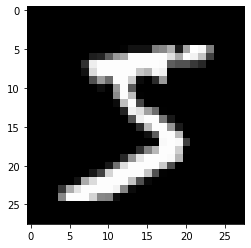

In [23]:
plt.imshow(image, 'gray')
plt.show()

In [24]:
image = image[tf.newaxis, ..., tf.newaxis]
image.shape

(1, 28, 28, 1)

 - filters: layer에서 나갈 때 몇개의 filter를 만들 것인지(a.k.a weights, filters, channels)
 - kernel_size: filter(Weight)의 사이즈
 - strides: 몇 개의 pixel을 skip하면서 훑어지나갈 것인지(사이즈에도 영향을 줌)
 - padding: zero padding을 만들 것인지. VALID는 Padding이 없고, SAME은 Padding이 있음(사이즈에도 영향)
 - activation: Activation Function을 만들것인지, 당장 설정 안해도 Layer층을 따로 만들 수 있음

In [25]:
# CNN : feature extraction(특징, 패턴 뽑기) - classification
tf.keras.layers.Conv2D(filters=3, kernel_size=(3,3), strides=(1,1),padding='SAME',activation='relu')
#tf.keras.layers.Conv2D(3, 3, 1, 'SAME') #activation=None

In [26]:
image = tf.cast(image, dtype=tf.float32)
image.dtype

tf.float32

In [27]:
layer = tf.keras.layers.Conv2D(3, 3, 1, padding='SAME')
layer

In [28]:
output = layer(image) # convolution
output

<tf.Tensor: shape=(1, 28, 28, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype

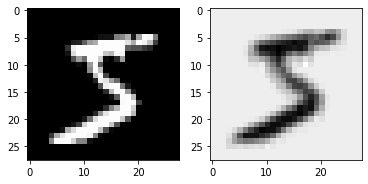

In [30]:
plt.subplot(1,2,1)
plt.imshow(image[0,:,:,0],'gray')
plt.subplot(1,2,2)
plt.imshow(output[0, :, :, 0], 'gray')
plt.show()

In [31]:
import numpy as np
np.min(image), np.max(image)

(0.0, 255.0)

In [32]:
np.min(output), np.max(output)

(-420.39624, 170.70915)

In [98]:
weight = layer.get_weights()
len(weight) # 앞에 있는 것은 w, 뒤에있는 것은 b
weight[0].shape, weight[1].shape

((3, 3, 1, 3), (3,))

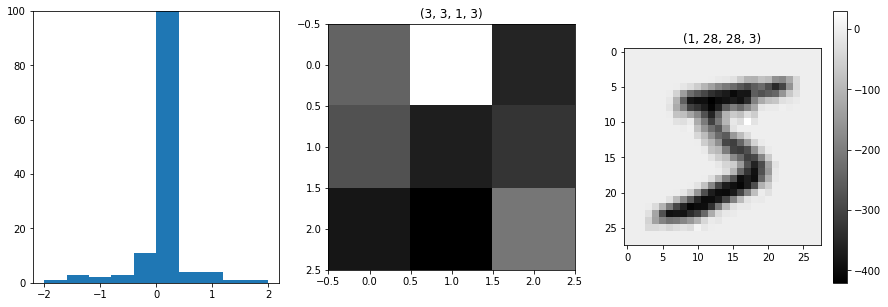

In [121]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.hist(output.numpy().ravel(), range=[-2,2])
plt.ylim(0, 100)
plt.subplot(132)
plt.title(weight[0].shape)
plt.imshow(weight[0][:,:,0,0],'gray')
plt.subplot(133)
plt.title(output.shape)
plt.imshow(output[0,:,:,0], 'gray')
plt.colorbar()
plt.show()

## Activation Function
 - 'ReLu' : 0미만은 다 없애주겠다.


In [115]:
np.min(output), np.max(output)

(-420.39624, 170.70915)

In [116]:
tf.keras.layers.ReLU()

In [117]:
act_layer = tf.keras.layers.ReLU()
act_output = act_layer(output)
output.shape

TensorShape([1, 28, 28, 3])

In [118]:
np.min(act_output), np.max(act_output)

(0.0, 170.70915)

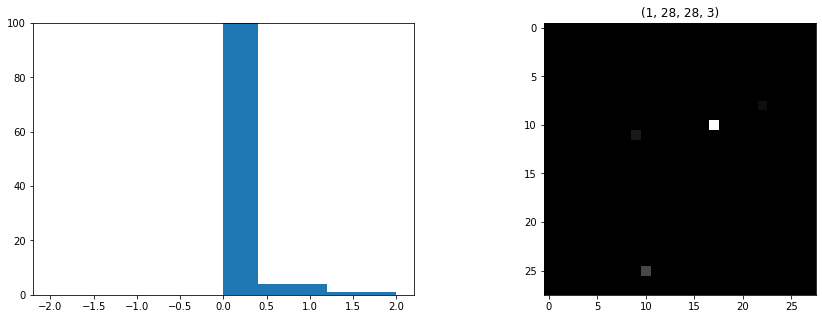

In [119]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(act_output.numpy().ravel(), range=[-2, 2])
plt.ylim(0, 100)

plt.subplot(122)
plt.title(act_output.shape)
plt.imshow(act_output[0, :, :, 0], 'gray')
plt.show()

## Pooling
 - 강조된 것만 가져온다. 크기가 반으로 줄어든다.
 - ex) max pooling

In [122]:
tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')

In [124]:
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='SAME')
pool_output = pool_layer(act_output)
act_output.shape, pool_output.shape

(TensorShape([1, 28, 28, 3]), TensorShape([1, 14, 14, 3]))

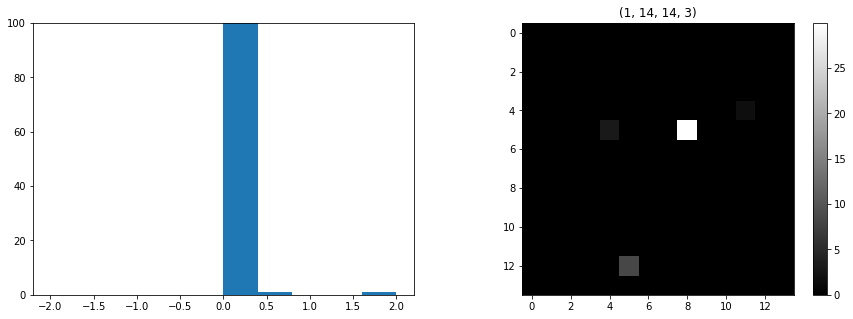

In [128]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(pool_output.numpy().ravel(), range=[-2,2])
plt.ylim(0, 100)

plt.subplot(122)
plt.title(pool_output.shape)
plt.imshow(pool_output[0, :, :, 0], 'gray')
plt.colorbar()
plt.show()

## Fully Connected

In [129]:
# Flatten
layer = tf.keras.layers.Flatten()
flatten = layer(output)
output.shape, flatten.shape #앞은 batch_size = 변하면 안된다.

(TensorShape([1, 28, 28, 3]), TensorShape([1, 2352]))

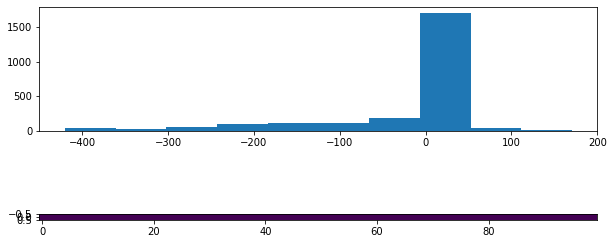

In [130]:
plt.figure(figsize=(10,5))
plt.subplot(211)
plt.hist(flatten.numpy().ravel())
plt.subplot(212)
plt.imshow(flatten[:,:100])
plt.show()

In [131]:
#Dense
layer = tf.keras.layers.Dense(32, activation='relu')
output = layer(flatten)
output.shape

TensorShape([1, 32])

In [132]:
#DropOut : Fully Connected시 정확도 증가를 위해서 랜덤하게 끊어줘 오버피팅 방지
layer = tf.keras.layers.Dropout(0.7) # 얼마나 끊고 살릴건지 비율을 준다.
output = layer(output)
output.shape

TensorShape([1, 32])

# 총정리

In [134]:
from tensorflow.keras import layers

In [135]:
input_shape = (28 ,28, 1)
num_classes = 10

In [147]:
inputs = layers.Input(shape=input_shape)

'''Feature Exraction'''
# Convolution Block
net = layers.Conv2D(32, 3, padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, 3, padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(64, 3, padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, 3, padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2, 2))(net)
net = layers.Dropout(0.25)(net)

'''Fully Connected'''
net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.25)(net)
net = layers.Dense(10)(net) #마지막으로 내보내는 node가 10개가 되어야한다. mnist는 0~9, node중 가장 큰 값이 정답이라고 생각할 것임
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

In [149]:
model

In [150]:
model.summary()

Model: "Basic_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0 